In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("~/code/aplabey/2nd_hand_fashion_valuation/raw_data/vestiaire.csv")

In [2]:
print(data.head())

   product_id            product_type  \
0    43247626         Wool mini skirt   
1    43247441                  Jacket   
2    43246517               Wool coat   
3    43246507              Mini skirt   
4    43246417  Vegan leather trousers   

                                        product_name  \
0  Wool mini skirt Miu Miu Grey size S Internatio...   
1      Jacket Barbara Bui Navy size 42 FR in Cotton    
2  Wool coat Comme Des Garcons White size S Inter...   
3     Mini skirt MSGM Black size 38 IT in Polyester    
4  Vegan leather trousers LVIR Black size 36 FR i...   

                                 product_description  \
0  Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...   
1  For selling nice women's suit Barbara Bui size...   
2  Magnificent boiled wool coat. I bought it in t...   
3  MSGM Skirt Black Printed Raw-Edge & Embroidere...   
4  LVIR black grained faux leather trousers size ...   

               product_keywords product_gender_target product_category  \
0    

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [4]:
data.columns

Index(['product_id', 'product_type', 'product_name', 'product_description',
       'product_keywords', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_like_count', 'sold',
       'reserved', 'available', 'in_stock', 'should_be_gone', 'brand_id',
       'brand_name', 'brand_url', 'product_material', 'product_color',
       'price_usd', 'seller_price', 'seller_earning', 'seller_badge',
       'has_cross_border_fees', 'buyers_fees', 'warehouse_name', 'seller_id',
       'seller_username', 'usually_ships_within', 'seller_country',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')

In [5]:
data["has_cross_border_fees"].head()

0     NaN
1    True
2    True
3    True
4    True
Name: has_cross_border_fees, dtype: object

In [6]:
data.duplicated().sum() 

np.int64(0)

In [7]:
# Counting the number of NaN for each column
data.isnull().sum().sort_values(ascending=False)

usually_ships_within          154791
buyers_fees                    13736
has_cross_border_fees          13736
product_keywords                1183
product_category                1183
seller_username                   39
product_description                7
product_material                   4
product_season                     2
product_color                      1
product_id                         0
product_type                       0
product_name                       0
sold                               0
available                          0
in_stock                           0
reserved                           0
product_like_count                 0
product_condition                  0
product_gender_target              0
brand_name                         0
brand_url                          0
should_be_gone                     0
brand_id                           0
seller_badge                       0
seller_earning                     0
price_usd                          0
s

In [8]:
# Counting the percentage of NaN for each column
data.isnull().sum().sort_values(ascending=False) / len(data) #NaN percentage for each column

usually_ships_within          0.171892
buyers_fees                   0.015254
has_cross_border_fees         0.015254
product_keywords              0.001314
product_category              0.001314
seller_username               0.000043
product_description           0.000008
product_material              0.000004
product_season                0.000002
product_color                 0.000001
product_id                    0.000000
product_type                  0.000000
product_name                  0.000000
sold                          0.000000
available                     0.000000
in_stock                      0.000000
reserved                      0.000000
product_like_count            0.000000
product_condition             0.000000
product_gender_target         0.000000
brand_name                    0.000000
brand_url                     0.000000
should_be_gone                0.000000
brand_id                      0.000000
seller_badge                  0.000000
seller_earning           

In [9]:
grouped_by_brand = data.groupby('brand_name')

In [10]:
brand_counts = grouped_by_brand.size().sort_values(ascending=False)
brand_counts

brand_name
Gucci               41009
Burberry            24018
Dolce & Gabbana     22024
Prada               20972
Hermès              18711
                    ...  
08sircus                1
sister + seekers        1
simple retro            1
one grey day            1
noir/noir               1
Length: 8884, dtype: int64

## discuss about threshold (useful? size?)

In [11]:
threshold = 50
brands_with_few_counts = brand_counts[brand_counts < threshold]
brands_with_few_counts

brand_name
khrisjoy                  49
Michel Vivien             49
Stella Forest             49
10 Crosby by Derek Lam    49
Gallery Dept              49
                          ..
08sircus                   1
sister + seekers           1
simple retro               1
one grey day               1
noir/noir                  1
Length: 7480, dtype: int64

In [12]:
brand_mapping = {brand: brand if count >= threshold else 'Others'
                 for brand, count in brand_counts.items()}

In [13]:
data['brand_name'] = data['brand_name'].map(brand_mapping)

In [14]:
brand_counts = data['brand_name'].value_counts()
brand_counts.sort_values(ascending=False)

brand_name
Others                      64790
Gucci                       41009
Burberry                    24018
Dolce & Gabbana             22024
Prada                       20972
                            ...  
CC Collection Corneliani       50
Arfango                        50
Halston                        50
Dagmar                         50
Gymshark                       50
Name: count, Length: 1405, dtype: int64

In [15]:
brand_price_mean = grouped_by_brand['price_usd'].mean().sort_values(ascending=False)
brand_price_mean

brand_name
Richard Mille              83408.116667
A. Lange & Sohne           50014.530000
Patek Philippe             34832.169735
Graff                      34727.760000
Audemars Piguet            22151.781268
                               ...     
Leather Satchel Company       19.800000
Silent Theory                 19.430000
Nude Lucy                     19.430000
Lahana swim                   19.430000
Jewelry For Less              14.300000
Name: price_usd, Length: 8884, dtype: float64

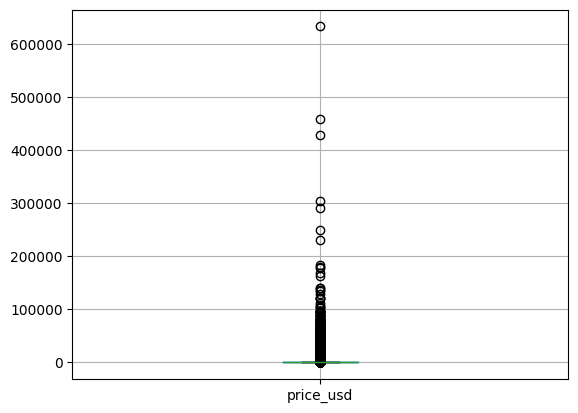

In [16]:
data[["price_usd"]].boxplot();

In [17]:
top_20_brands = data['brand_name'].value_counts().head(20).index
filtered_data = data[data['brand_name'].isin(top_20_brands)]
# Filter the DataFrame to include only the top 20 brands

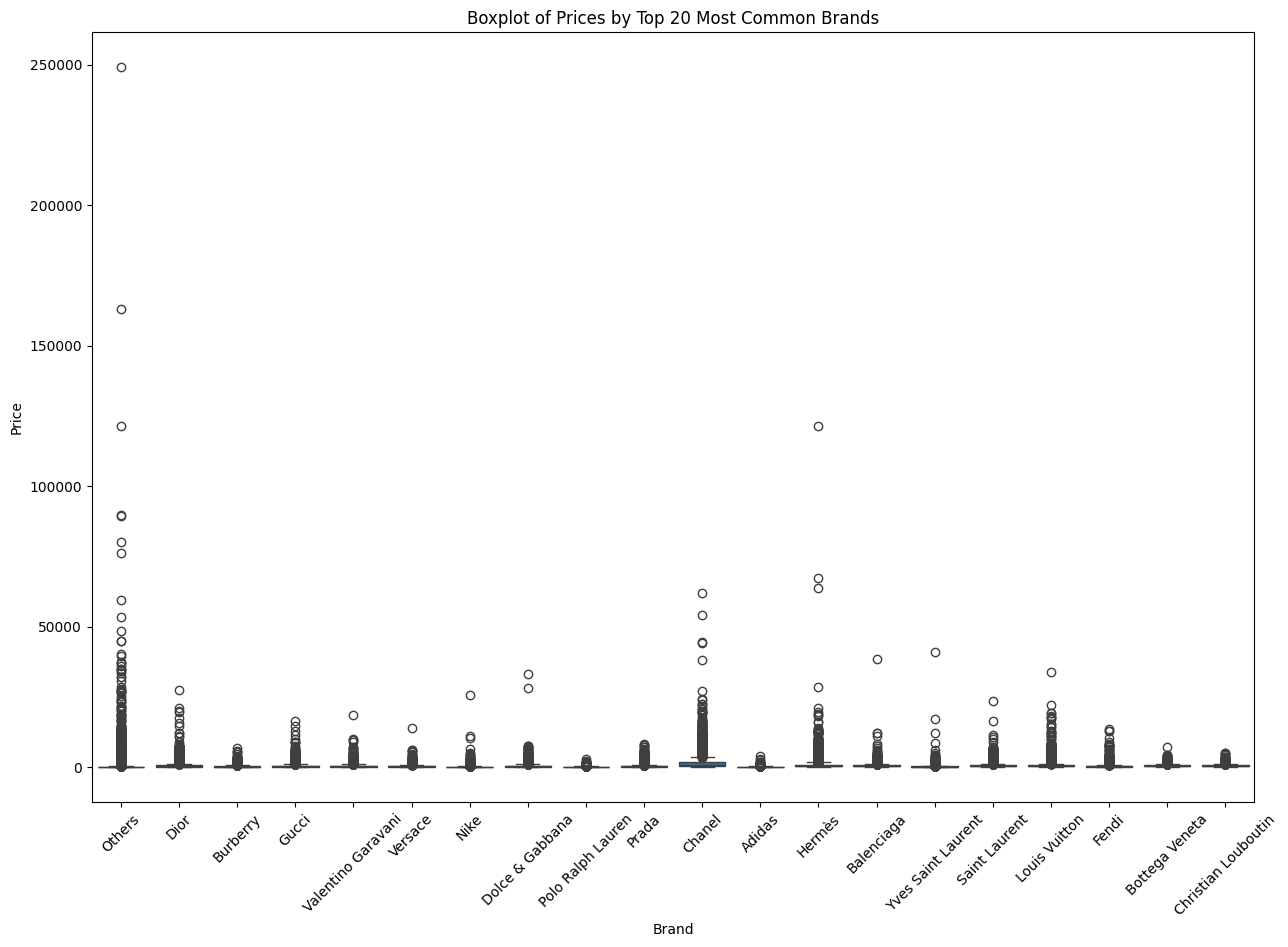

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(x='brand_name', y='price_usd', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Boxplot of Prices by Top 20 Most Common Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show();

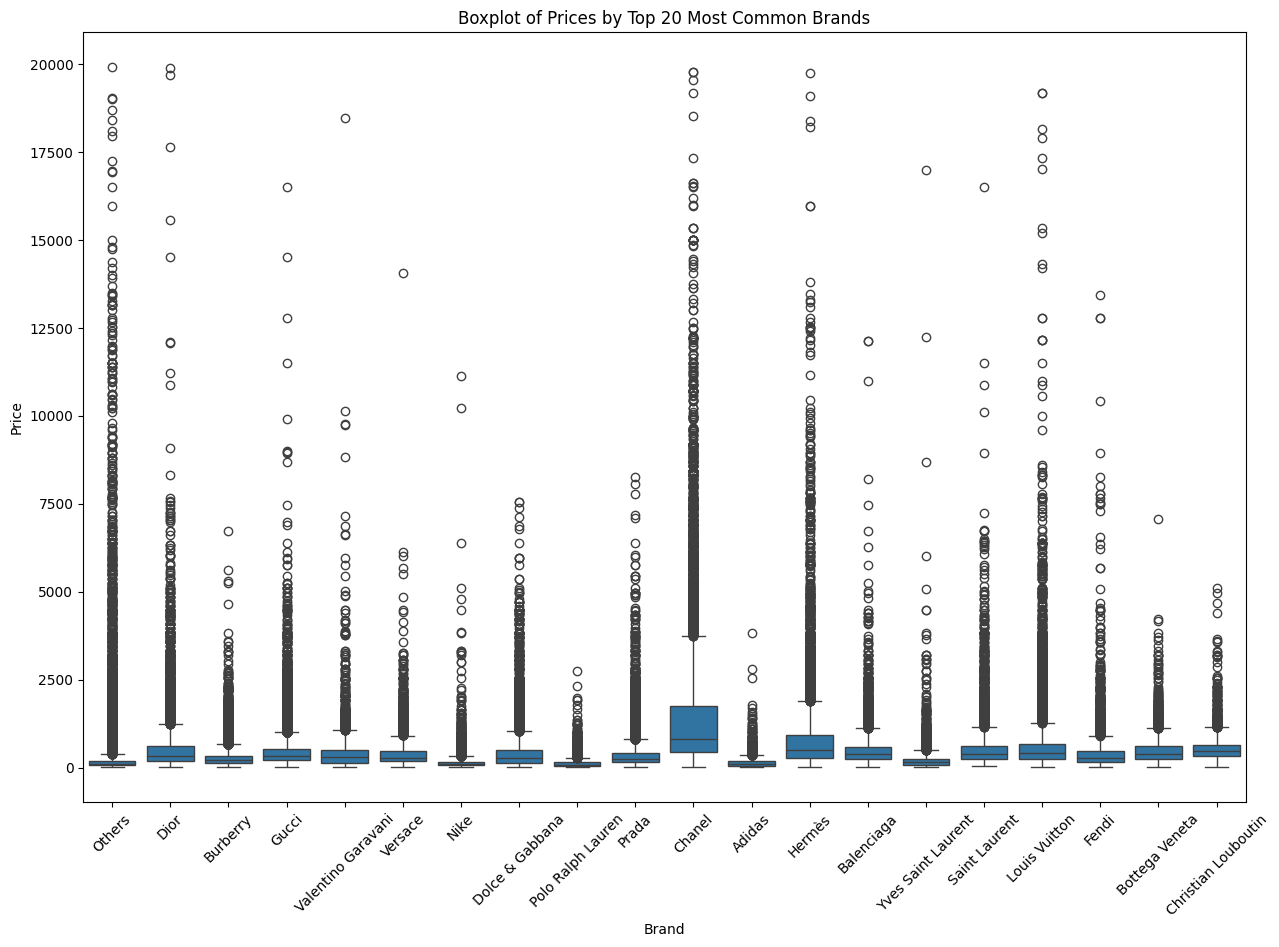

In [19]:
# Save the indexes corresponding to rows 
# without very high values (price < 200.000)
boolean_mask = (filtered_data['price_usd']<20000) 

# Apply the boolean filtering
filtered_data_boolean = filtered_data[boolean_mask].reset_index(drop=True)

# Visualize the boxplot again
plt.figure(figsize=(15, 10))
sns.boxplot(x='brand_name', y='price_usd', data=filtered_data_boolean)
plt.xticks(rotation=45)
plt.title('Boxplot of Prices by Top 20 Most Common Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show();

## Dropping Data

In [20]:
from sklearn.impute import SimpleImputer

# Step 1: Calculate the overall most frequent value
overall_most_frequent_value = data['usually_ships_within'].mode()[0]

# Step 2: Define the imputation function
def impute_most_frequent(group):
    # Check if all values in the group are missing
    if group['usually_ships_within'].isnull().all():
        # Impute with the overall most frequent value
        group['usually_ships_within'] = overall_most_frequent_value
    else:
        imputer = SimpleImputer(strategy="most_frequent")
        # Reshape to 2D array because SimpleImputer expects it
        group_reshaped = group[['usually_ships_within']].values.reshape(-1, 1)
        imputed = imputer.fit_transform(group_reshaped)
        group['usually_ships_within'] = imputed.ravel()
    return group

# Step 3: Group by 'brand_name' and apply the imputation function
data = data.groupby('brand_name').apply(impute_most_frequent).reset_index(drop=True)



/tmp/ipykernel_12339/859509969.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('brand_name').apply(impute_most_frequent).reset_index(drop=True)


In [21]:
# Counting the percentage of NaN for each column
data.isnull().sum().sort_values(ascending=False)

buyers_fees                   13736
has_cross_border_fees         13736
product_category               1183
product_keywords               1183
seller_username                  39
product_description               7
product_material                  4
product_season                    2
product_color                     1
product_name                      0
product_id                        0
product_type                      0
reserved                          0
sold                              0
available                         0
in_stock                          0
brand_id                          0
product_like_count                0
product_condition                 0
product_gender_target             0
brand_name                        0
brand_url                         0
should_be_gone                    0
price_usd                         0
seller_badge                      0
seller_earning                    0
warehouse_name                    0
seller_price                

In [22]:
data.drop(['buyers_fees', 'has_cross_border_fees'], axis=1, inplace=True)

In [23]:
data.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,0.0,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",1.0,...,Tourcoing,143269,stella143269,1-2 days,France,17.0,38.0,162473.0,45.0,76.0


In [24]:
data_cleaned = data.dropna()
data_cleaned.isnull().sum().sort_values(ascending=False)

product_id                    0
product_type                  0
product_name                  0
product_description           0
product_keywords              0
product_gender_target         0
product_category              0
product_season                0
product_condition             0
product_like_count            0
sold                          0
reserved                      0
available                     0
in_stock                      0
should_be_gone                0
brand_id                      0
brand_name                    0
brand_url                     0
product_material              0
product_color                 0
price_usd                     0
seller_price                  0
seller_earning                0
seller_badge                  0
warehouse_name                0
seller_id                     0
seller_username               0
usually_ships_within          0
seller_country                0
seller_products_sold          0
seller_num_products_listed    0
seller_c

In [25]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899278 entries, 0 to 900513
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  899278 non-null  int64  
 1   product_type                899278 non-null  object 
 2   product_name                899278 non-null  object 
 3   product_description         899278 non-null  object 
 4   product_keywords            899278 non-null  object 
 5   product_gender_target       899278 non-null  object 
 6   product_category            899278 non-null  object 
 7   product_season              899278 non-null  object 
 8   product_condition           899278 non-null  object 
 9   product_like_count          899278 non-null  float64
 10  sold                        899278 non-null  bool   
 11  reserved                    899278 non-null  bool   
 12  available                   899278 non-null  bool   
 13  in_stock           

## Preprocessing

### Product_like_count
#### As it is very skewed I chose Robust Scaler

#### Feature Transformation/Engineering

If your feature is extremely skewed  
→
  consider Feature Engineering first (e.g. log(feature))
shell we do this?

# The following code is just how we would do without brands

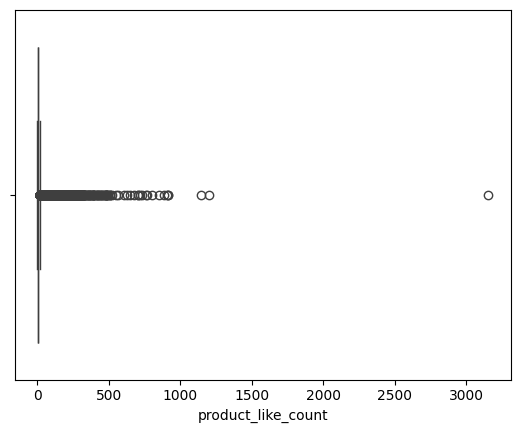

In [26]:
sns.boxplot(data=data_cleaned, x='product_like_count');
plt.show()

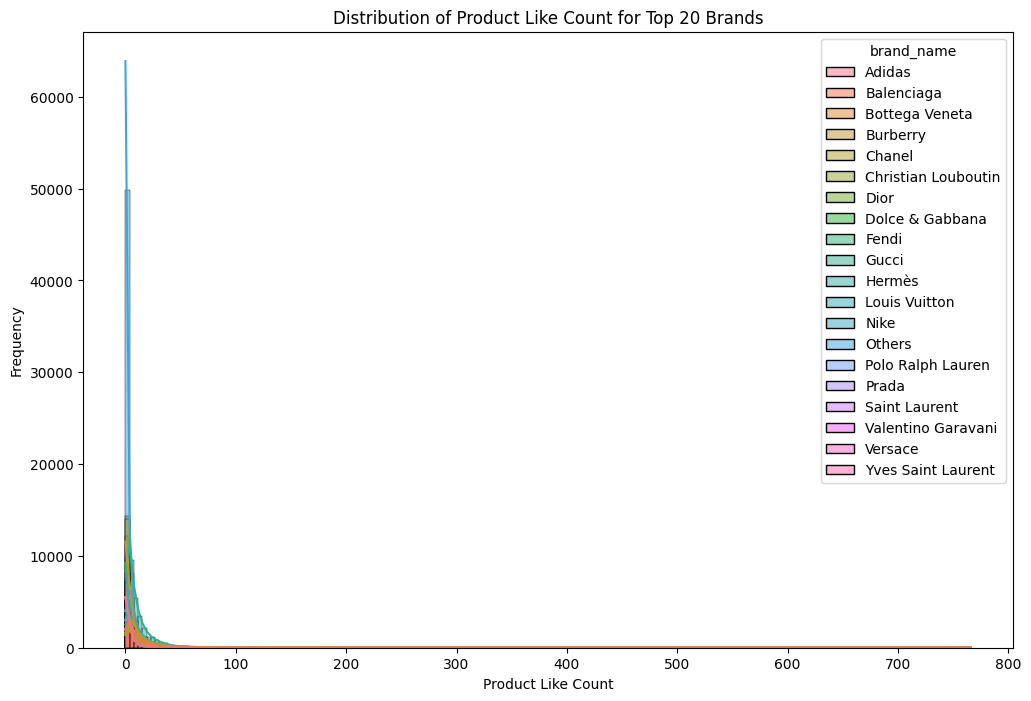

In [27]:
# Step 1: Identify the top 20 most common brands
top_brands = data_cleaned['brand_name'].value_counts().head(20).index

# Step 2: Filter the data to only include these top brands
filtered_data = data_cleaned[data_cleaned['brand_name'].isin(top_brands)]

# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
likes_hist = sns.histplot(filtered_data, x='product_like_count', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Distribution of Product Like Count for Top 20 Brands')
plt.xlabel('Product Like Count')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [28]:
from sklearn.preprocessing import RobustScaler

# Make sure that brand_name is only a column and not an index
data_cleaned = data_cleaned.reset_index(drop=True)

# Function to apply RobustScaler to each group
def scale_group(group):
    rb_scaler = RobustScaler()
    group['product_like_count'] = rb_scaler.fit_transform(group[['product_like_count']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_12339/3088505051.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.000000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.000000,...,Tourcoing,143269,stella143269,1-2 days,France,17.0,38.0,162473.0,45.0,76.0


### Seller_products_sold

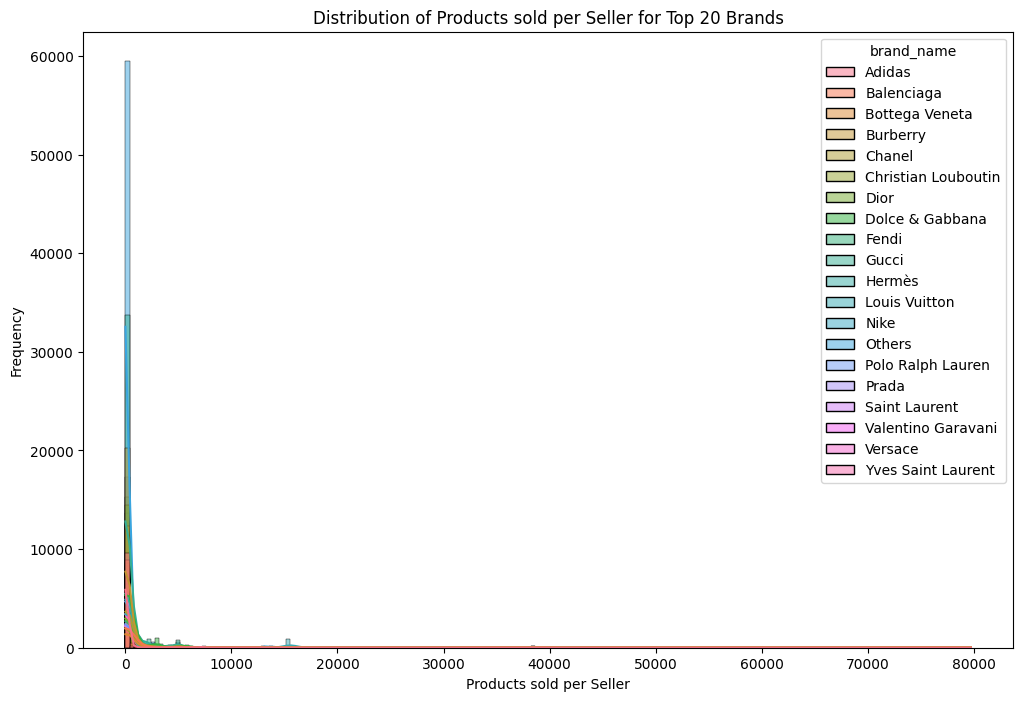

In [29]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
products_sold_hist = sns.histplot(filtered_data, x='seller_products_sold', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Distribution of Products sold per Seller for Top 20 Brands')
plt.xlabel('Products sold per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [30]:
def scale_group(group):
    rb_scaler = RobustScaler()
    group['seller_products_sold'] = rb_scaler.fit_transform(group[['seller_products_sold']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_12339/3039006097.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,3221.0,6536.0,1758.0,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.000000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,3221.0,6536.0,1758.0,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,3221.0,6536.0,1758.0,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,3221.0,6536.0,1758.0,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.000000,...,Tourcoing,143269,stella143269,1-2 days,France,-0.010101,38.0,162473.0,45.0,76.0


### Seller_num_products_listed 

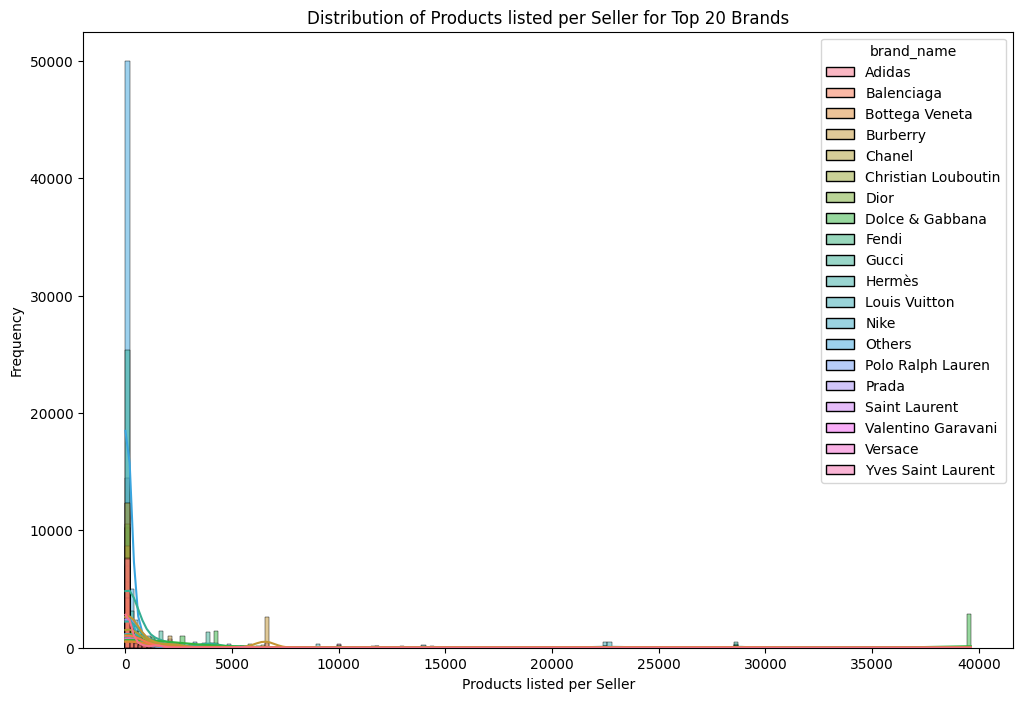

In [31]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
products_listed_hist = sns.histplot(filtered_data, x='seller_num_products_listed', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Distribution of Products listed per Seller for Top 20 Brands')
plt.xlabel('Products listed per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [32]:
def scale_group(group):
    rb_scaler = RobustScaler()
    group['seller_num_products_listed'] = rb_scaler.fit_transform(group[['seller_num_products_listed']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_12339/2144842473.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,6536.0,1758.0,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.000000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,6536.0,1758.0,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,6536.0,1758.0,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,6536.0,1758.0,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.000000,...,Tourcoing,143269,stella143269,1-2 days,France,-0.010101,0.062112,162473.0,45.0,76.0


### Seller_community_rank

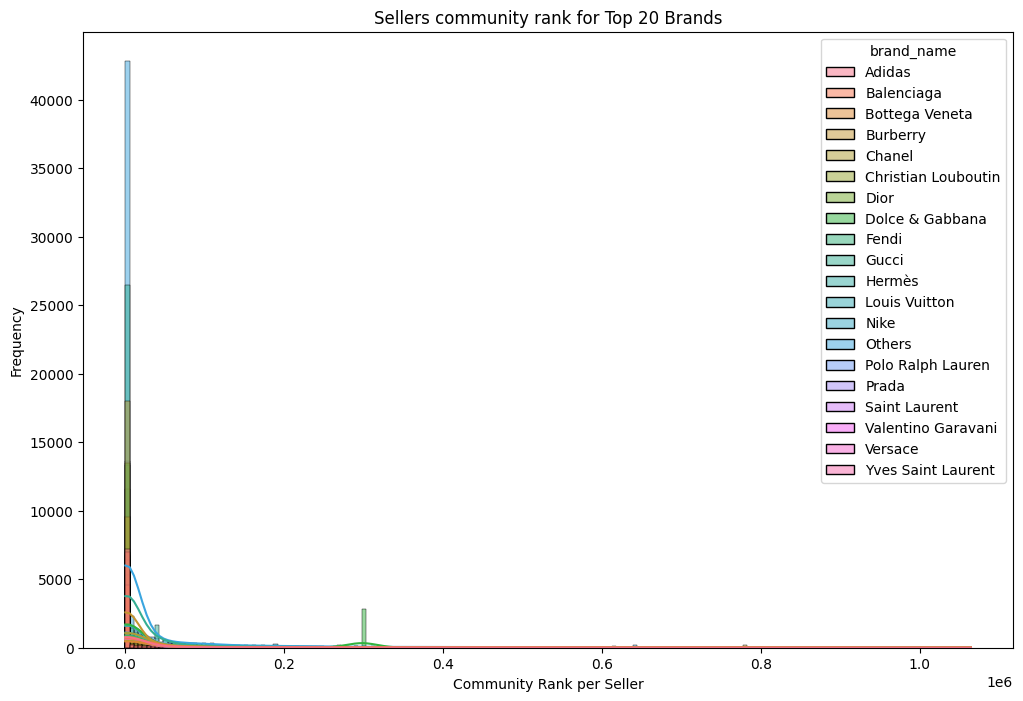

In [33]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
community_rank_hist = sns.histplot(filtered_data, x='seller_community_rank', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Sellers community rank for Top 20 Brands')
plt.xlabel('Community Rank per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [34]:
def scale_group(group):
    rb_scaler = RobustScaler()
    group['seller_community_rank'] = rb_scaler.fit_transform(group[['seller_community_rank']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_12339/1043870034.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,1758.0,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.000000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,1758.0,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,1758.0,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,1758.0,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.000000,...,Tourcoing,143269,stella143269,1-2 days,France,-0.010101,0.062112,5.398578,45.0,76.0


### Seller_num_followers

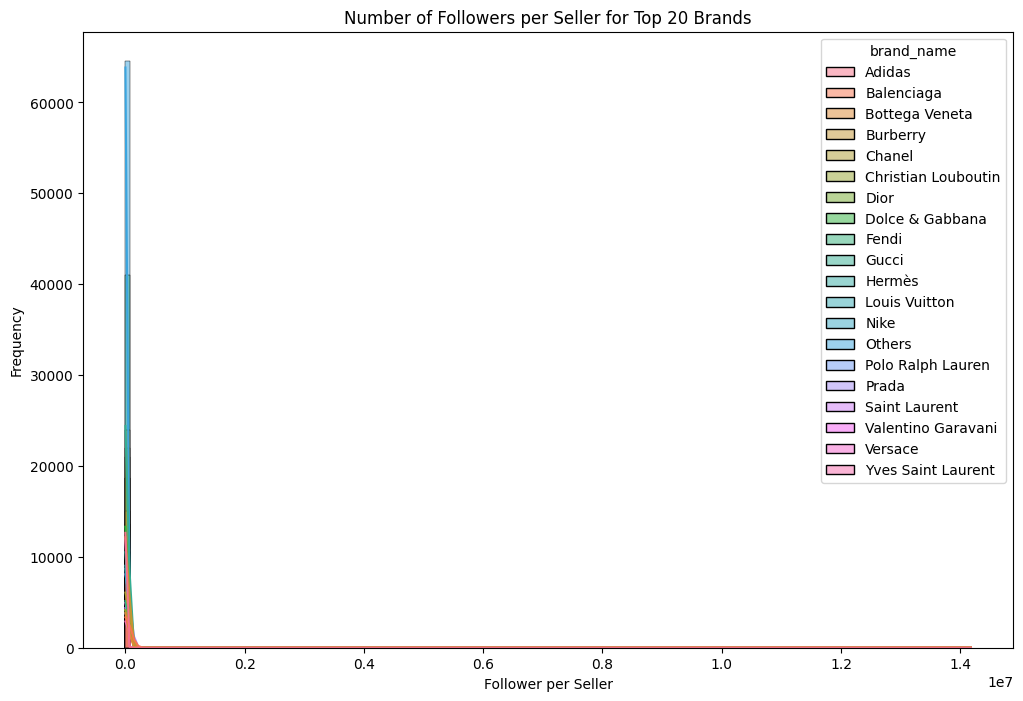

In [35]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
num_followers_hist = sns.histplot(filtered_data, x='seller_num_followers', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Number of Followers per Seller for Top 20 Brands')
plt.xlabel('Follower per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [36]:
def scale_group(group):
    rb_scaler = RobustScaler()
    group['seller_num_followers'] = rb_scaler.fit_transform(group[['seller_num_followers']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_12339/2450826628.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.000000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.000000,...,Tourcoing,143269,stella143269,1-2 days,France,-0.010101,0.062112,5.398578,0.015707,76.0


### Seller_pass_rate

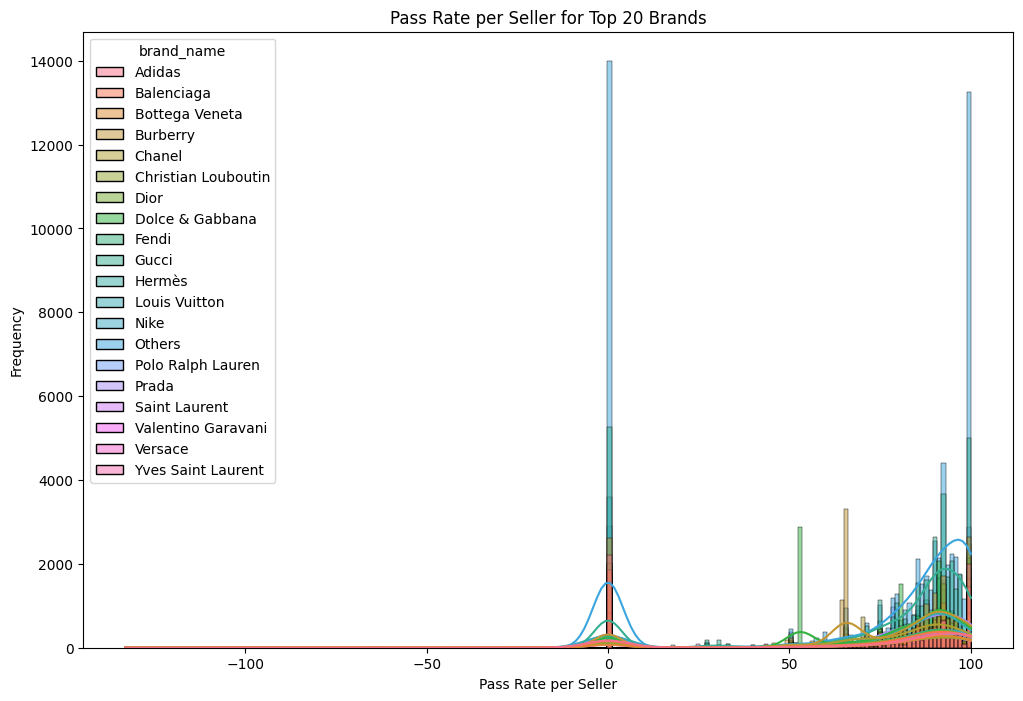

In [37]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
pass_rate_hist = sns.histplot(filtered_data, x='seller_pass_rate', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Pass Rate per Seller for Top 20 Brands')
plt.xlabel('Pass Rate per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [38]:
def scale_group(group):
    rb_scaler = RobustScaler()
    group['seller_pass_rate'] = rb_scaler.fit_transform(group[['seller_pass_rate']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_12339/2961266350.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,-0.291667
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.000000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,-0.291667
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,-0.291667
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,-0.291667
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.000000,...,Tourcoing,143269,stella143269,1-2 days,France,-0.010101,0.062112,5.398578,0.015707,-0.416667


In [39]:
data_cleaned.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,-0.291667
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.000000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,-0.291667
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,-0.291667
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,-0.333333,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,-0.291667
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.000000,...,Tourcoing,143269,stella143269,1-2 days,France,-0.010101,0.062112,5.398578,0.015707,-0.416667


### Product_gender_target

In [40]:
from sklearn.preprocessing import OneHotEncoder

# Check unique values for streets (3)
print(f"The unique values for 'Product_gender_target' are {data_cleaned.product_gender_target.unique()}")

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
ohe.fit(data_cleaned[['product_gender_target']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Transform the current "Street" column
data_cleaned[ohe.get_feature_names_out()] = ohe.transform(data_cleaned[['product_gender_target']])

# Drop the column "Street" which has been encoded
data_cleaned = data_cleaned.drop(columns = ["product_gender_target"])

The unique values for 'Product_gender_target' are ['Women' 'Men']
The categories detected by the OneHotEncoder are [array(['Men', 'Women'], dtype=object)]


In [41]:
# Show the dataset
data_cleaned.head(3)

,product_id,product_type,product_name,product_description,product_keywords,product_category,product_season,product_condition,product_like_count,sold,...,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,product_gender_target_Men,product_gender_target_Women
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women Clothing,All seasons,Very good condition,-0.333333,False,...,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,-0.291667,0.0,1.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women Clothing,All seasons,Very good condition,0.000000,False,...,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,-0.291667,0.0,1.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women Clothing,All seasons,Very good condition,-0.333333,False,...,mai15397859,3-5 days,Sweden,27.141414,19.832298,0.205092,8.984293,-0.291667,0.0,1.0


## Observing the Correlartion

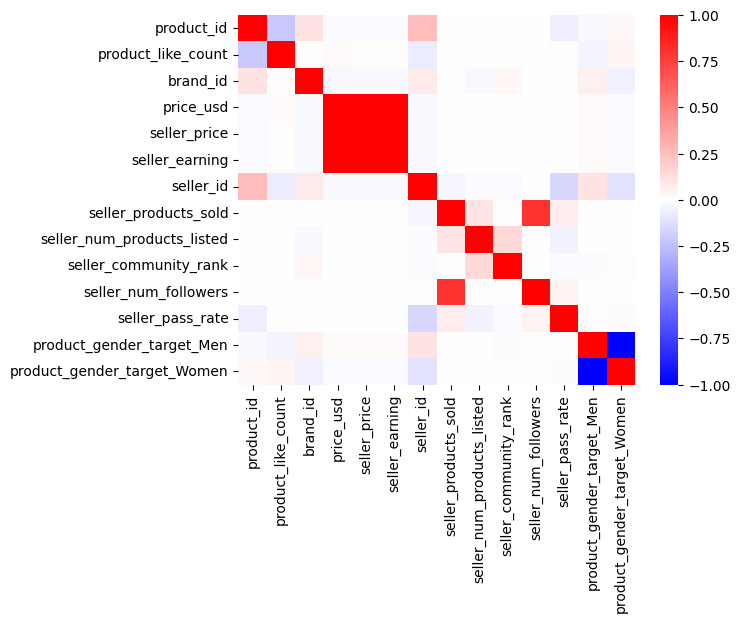

In [42]:
%matplotlib inline

# Standard import for matplotlib
import matplotlib.pyplot as plt

# Your plotting code
correlation_matrix = data_cleaned.select_dtypes('number').corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names, cmap="bwr")

# Make sure to show the plot
plt.show();

In [43]:
# Convert the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Rename the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [44]:
# Compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Showe the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(15*2)

,feature_1,feature_2,correlation,absolute_correlation
181,product_gender_target_Men,product_gender_target_Women,-1.000000,1.000000
194,product_gender_target_Women,product_gender_target_Men,-1.000000,1.000000
74,seller_earning,seller_price,0.998985,0.998985
61,seller_price,seller_earning,0.998985,0.998985
46,price_usd,seller_price,0.998117,0.998117
59,seller_price,price_usd,0.998117,0.998117
73,seller_earning,price_usd,0.997447,0.997447
47,price_usd,seller_earning,0.997447,0.997447
147,seller_num_followers,seller_products_sold,0.797628,0.797628
108,seller_products_sold,seller_num_followers,0.797628,0.797628
